In [2]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.regularizers import l1
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [3]:
! pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.0 MB/s eta 0:00:00


In [4]:
from category_encoders import OrdinalEncoder

In [5]:
! pip install plot_keras_history

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.5/322.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=4ac4a37f0e0a2e03ce280a2396f9d76e194e3d8acc767ae49b271c3af4e6f4cd
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=0db18b89e4813ed677239025a2190a4eed1cbcde601a8cebbc91d00608c90fed
  Stored in directory: /root/.cache/pip/wheels/30/9f/f5/37d037c39ac8b305590d5956f7021c6ca94b63c68be24f6841
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl size=5630 sha256=a0c83a8c5fe6ff4ab661adc00ca866d86920b0f44a0a92ff6c2aaffd6e1176d6
  Stored in directo

In [6]:
! pip install pyyaml h5py

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
from plot_keras_history import show_history, plot_history, chain_histories
import matplotlib.pyplot as plt


=======================<br>
load the dataset

In [9]:
from google.colab import files

In [10]:
uploaded=files.upload()

Saving airlinessat.csv to airlinessat.csv


In [11]:
def load_dataset(filename):
 # load the dataset as a pandas DataFrame
 df =pd.read_csv(filename,index_col=0)
 colind=df.columns[df.isna().sum()>0]

 for ii in range(len(colind)):
   df[colind[ii]].fillna(df[colind[ii]].median(axis=0), inplace=True)
   df[colind[ii]]=pd.Categorical(df[colind[ii]])

 data = pd.read_csv(filename,index_col=0,dtype='str').astype('category')
 data = data.drop(data.iloc[:,[0]], axis=1)
 columns=data.columns[:-1]

 for ii in range(len(colind)):
     data[colind[ii]] = df[colind[ii]].cat.codes

 # retrieve numpy array
 dataset = data.values
 # split into input (X) and output (y) variables
 X = dataset[:, :-1]
 y = dataset[:,-1]
 # format all fields as string
 X = X.astype(str)
 return X, y,columns

prepare input data

In [12]:
def prepare_inputs(X_train, X_test):
 oe = OrdinalEncoder()
 no = Normalizer()
 pp=oe.fit(X_train)
 X_train_enc_1= oe.transform(X_train)
 X_test_enc_1 = oe.transform(X_test)
 X_train_enc =no.transform(X_train_enc_1)
 X_test_enc= no.transform(X_test_enc_1)
 return X_train_enc, X_test_enc

prepare target

In [13]:
def prepare_targets(y_train, y_test):
 le = LabelEncoder()
 le.fit(y_train)
 y_train_enc = le.transform(y_train)
 y_test_enc = le.transform(y_test)
 return y_train_enc, y_test_enc

load the dataset

In [14]:
X, y,feature_names_in = load_dataset('airlinessat.csv')
print(list(feature_names_in))

['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


split into train and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1,shuffle=True)

prepare input data

In [16]:
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

prepare output data

In [17]:
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [ ]:
#X_train_enc, X_val_enc, y_train_enc, y_val_enc = train_test_split(X_train_enc_0, y_train_enc_0, test_size=0.05, random_state=1)

rint("==================================================")

In [18]:
input_dim=len(feature_names_in)

In [19]:
print(input_dim)

22


In [20]:
checkpoint = ModelCheckpoint("airlinesat.h5", monitor = 'val_accuracy', save_best_only=True)

Define the model

In [21]:
def create_model():
  model = Sequential()
  model.add(Dense(units=input_dim, activation='relu', activity_regularizer=l1(0.001), input_dim=input_dim))
  model.add(Dense(units=1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

Compile the model

In [22]:
model = create_model()

Train the model on the training data using an appropriate loss function, optimizer, and evaluation metric.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 1)                 23        
                                                                 
Total params: 529 (2.07 KB)
Trainable params: 529 (2.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history0=model.fit(X_train_enc, y_train_enc, epochs=600, batch_size=32, validation_data=[X_test_enc,y_test_enc],callbacks=[checkpoint])

Epoch 1/600
3450/3450 [==============================] - 8s 2ms/step - loss: 0.6634 - accuracy: 0.6017 - val_loss: 0.6485 - val_accuracy: 0.6201
Epoch 2/600
  98/3450 [..............................] - ETA: 5s - loss: 0.6547 - accuracy: 0.6084

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3450/3450 [==============================] - 7s 2ms/step - loss: 0.6308 - accuracy: 0.6489 - val_loss: 0.6128 - val_accuracy: 0.6715
Epoch 3/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.6014 - accuracy: 0.6783 - val_loss: 0.5856 - val_accuracy: 0.6921
Epoch 4/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5780 - accuracy: 0.7013 - val_loss: 0.5658 - val_accuracy: 0.7097
Epoch 5/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5590 - accuracy: 0.7176 - val_loss: 0.5505 - val_accuracy: 0.7279
Epoch 6/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5431 - accuracy: 0.7304 - val_loss: 0.5378 - val_accuracy: 0.7265
Epoch 7/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5294 - accuracy: 0.7423 - val_loss: 0.5202 - val_accuracy: 0.7519
Epoch 8/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.5173 - accuracy: 0.7527 - val_loss: 0.5086 - val_accuracy: 0.76

Save model

In [ ]:
model.save("airlinesat.h5")
files.download("airlinesat.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!mkdir -p saved_model
model.save('saved_model/airlinesat')

In [ ]:
model=load_model("airlinesat.h5")

In [ ]:
model =load_model('saved_model/airlinesat')


Evaluate the Model:

(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

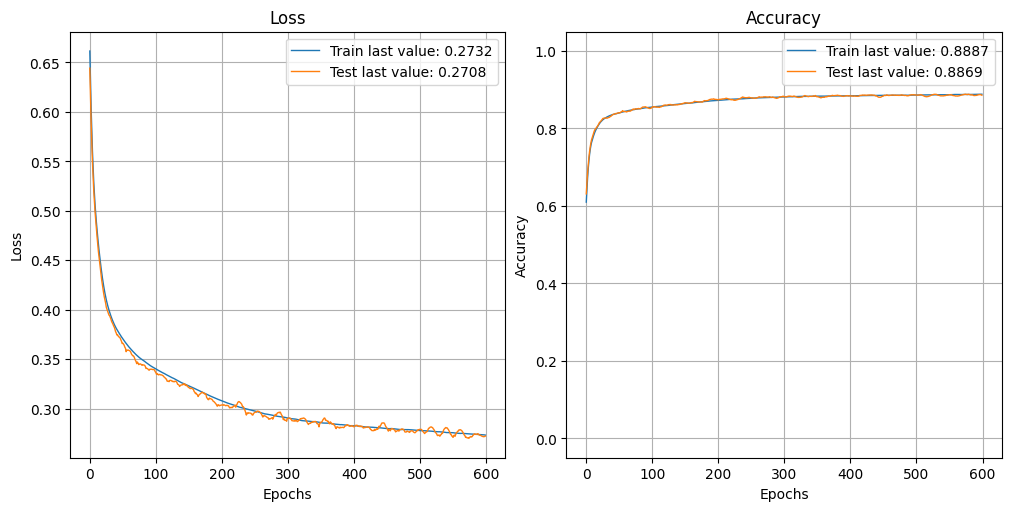

In [ ]:
plot_history(history0, path="interpolated.png", interpolate=True)


Evaluate the model's performance on the testing set using metrics such as accuracy, precision, recall, and F1 score.

In [ ]:
loss, accuracy = model.evaluate(X_test_enc, y_test_enc)

609/609 [==============================] - 3s 4ms/step - loss: 0.2708 - accuracy: 0.8869


In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8869212865829468


In [ ]:
history1=model.fit(X_train_enc, y_train_enc, epochs=300, batch_size=32, validation_data=[X_test_enc,y_test_enc],callbacks=[checkpoint])

Epoch 1/300
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2730 - accuracy: 0.8887 - val_loss: 0.2714 - val_accuracy: 0.8896
Epoch 2/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2736 - accuracy: 0.8885 - val_loss: 0.2771 - val_accuracy: 0.8865
Epoch 3/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2737 - accuracy: 0.8880 - val_loss: 0.2731 - val_accuracy: 0.8850
Epoch 4/300
3450/3450 [==============================] - 6s 2ms/step - loss: 0.2737 - accuracy: 0.8882 - val_loss: 0.2744 - val_accuracy: 0.8823
Epoch 5/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2731 - accuracy: 0.8887 - val_loss: 0.2675 - val_accuracy: 0.8902
Epoch 6/300
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2736 - accuracy: 0.8892 - val_loss: 0.2725 - val_accuracy: 0.8882
Epoch 7/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2733 - accuracy: 0.8883 - val_loss: 0.2686 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3450/3450 [==============================] - 6s 2ms/step - loss: 0.2720 - accuracy: 0.8894 - val_loss: 0.2703 - val_accuracy: 0.8904
Epoch 41/300
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2729 - accuracy: 0.8890 - val_loss: 0.2686 - val_accuracy: 0.8921
Epoch 42/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2721 - accuracy: 0.8883 - val_loss: 0.2649 - val_accuracy: 0.8911
Epoch 43/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2718 - accuracy: 0.8895 - val_loss: 0.2658 - val_accuracy: 0.8916
Epoch 44/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2721 - accuracy: 0.8892 - val_loss: 0.2694 - val_accuracy: 0.8874
Epoch 45/300
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2715 - accuracy: 0.8890 - val_loss: 0.2678 - val_accuracy: 0.8883
Epoch 46/300
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2717 - accuracy: 0.8894 - val_loss: 0.2649 - val_accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test_enc, y_test_enc)

609/609 [==============================] - 1s 1ms/step - loss: 0.2700 - accuracy: 0.8884


In [ ]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8884097933769226


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

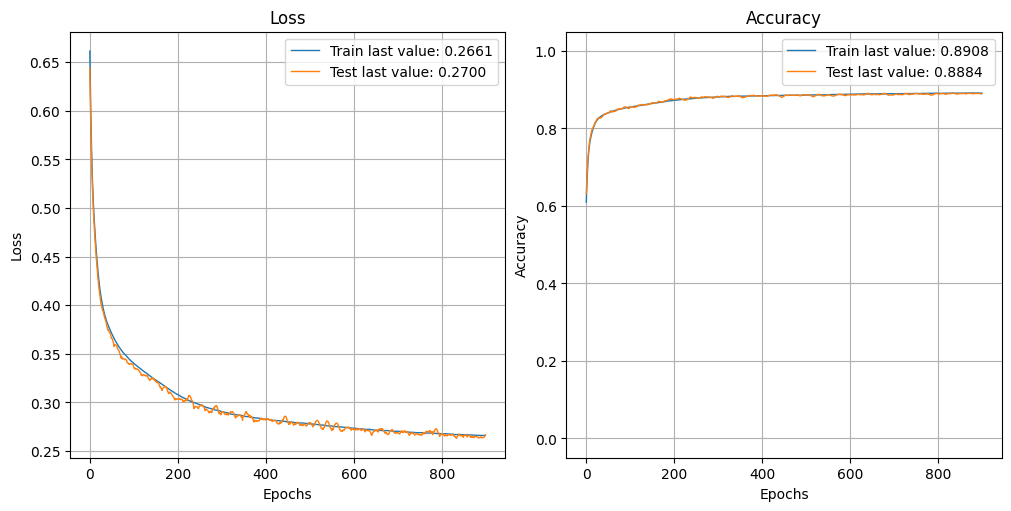

In [ ]:
plot_history(history, path="interpolated.png", interpolate=True)


In [31]:
uploaded=files.upload()

Saving airlinesat (1).h5 to airlinesat (1).h5


In [33]:
model =load_model('airlinesat (1).h5')


In [34]:
history2=model.fit(X_train_enc, y_train_enc, epochs=600, batch_size=32, validation_data=[X_test_enc,y_test_enc],callbacks=[checkpoint])
model.save("airlinesat280124_0957.h5")
files.download("airlinesat280124_0957.h5")

Epoch 1/600
3450/3450 [==============================] - 9s 2ms/step - loss: 0.2738 - accuracy: 0.8883 - val_loss: 0.2719 - val_accuracy: 0.8860
Epoch 2/600
  97/3450 [..............................] - ETA: 5s - loss: 0.2622 - accuracy: 0.8882

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3450/3450 [==============================] - 7s 2ms/step - loss: 0.2736 - accuracy: 0.8885 - val_loss: 0.2729 - val_accuracy: 0.8841
Epoch 3/600
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2734 - accuracy: 0.8877 - val_loss: 0.2807 - val_accuracy: 0.8861
Epoch 4/600
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2737 - accuracy: 0.8883 - val_loss: 0.2738 - val_accuracy: 0.8894
Epoch 5/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2732 - accuracy: 0.8882 - val_loss: 0.2700 - val_accuracy: 0.8919
Epoch 6/600
3450/3450 [==============================] - 8s 2ms/step - loss: 0.2734 - accuracy: 0.8884 - val_loss: 0.2714 - val_accuracy: 0.8881
Epoch 7/600
3450/3450 [==============================] - 6s 2ms/step - loss: 0.2731 - accuracy: 0.8879 - val_loss: 0.2676 - val_accuracy: 0.8914
Epoch 8/600
3450/3450 [==============================] - 7s 2ms/step - loss: 0.2732 - accuracy: 0.8885 - val_loss: 0.2677 - val_accuracy: 0.88

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
loss, accuracy = model.evaluate(X_test_enc, y_test_enc)

609/609 [==============================] - 1s 2ms/step - loss: 0.2574 - accuracy: 0.8927


In [36]:
print(f'Accuracy: {accuracy}')

Accuracy: 0.8927214741706848


(<Figure size 1000x500 with 2 Axes>,
 array([<Axes: title={'center': 'Loss'}, xlabel='Epochs', ylabel='Loss'>,
        <Axes: title={'center': 'Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

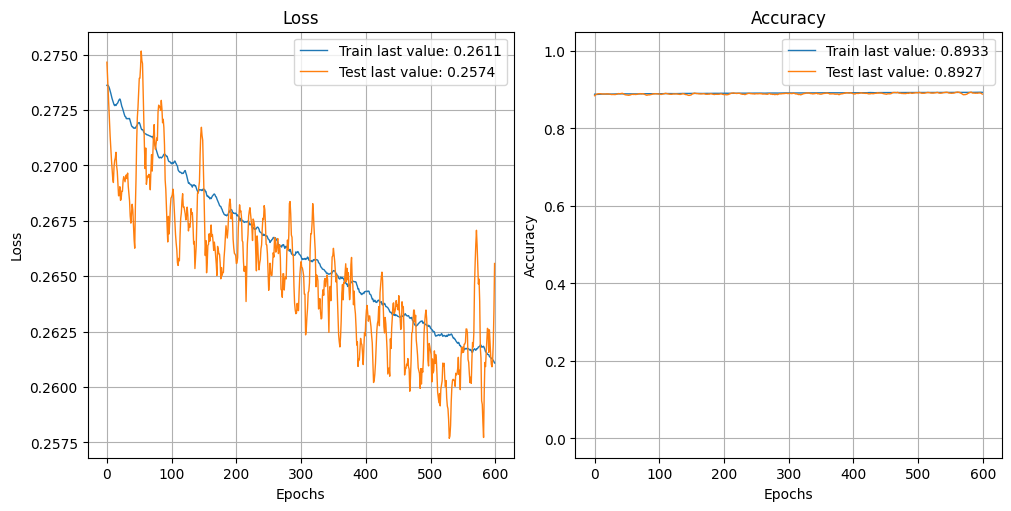

In [37]:
plot_history(history2, path="interpolated.png", interpolate=True)


Fine-Tuning:

Experiment with hyperparameter tuning, adjusting the neural network architecture, or using techniques like dropout to improve model performance.

Predictions:

</br> The trained model to make predictions on new or unseen data.<br>
Make predictions

In [38]:
#predictions = model.predict(X_new_data)

nterpretability (Optional):

epending on the complexity of the model, consider techniques or tools for interpreting and explaining model predictions, such as SHAP (SHapley Additive exPlanations) values.